Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


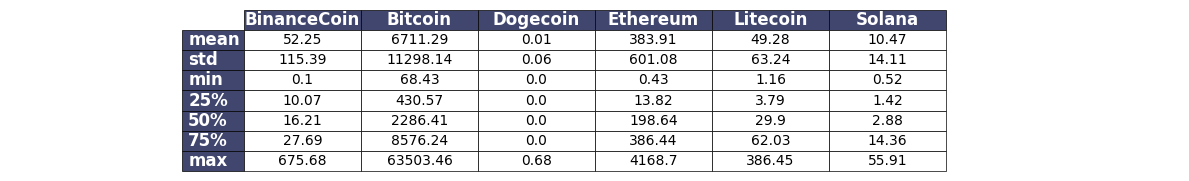

In [26]:
from IPython import get_ipython
from IPython.display import display

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import os

# Set the path to the folder containing your CSV files
folder_path = '/content/drive/MyDrive/Crypto Market'

crypto_data = {}  # Dictionary to store data

# Load and clean data
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path, parse_dates=['Date'])
        df.set_index('Date', inplace=True)
        df.dropna(inplace=True)  # Handling missing values
        crypto_data[filename[:-4]] = df

import matplotlib.pyplot as plt
import pandas as pd

# Define the statistics you want to include
stats = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

# Collect all summaries into one DataFrame
all_summaries = pd.DataFrame()

for coin_name, df in crypto_data.items():
    # Calculate the summary statistics for the 'Close' column
    summary = df['Close'].describe().loc[stats].to_frame(coin_name).round(2)
    all_summaries = pd.concat([all_summaries, summary], axis=1)

# Plotting the summary statistics table
fig, ax = plt.subplots(figsize=(12, 2))
ax.axis('off')

# Create the table
table = ax.table(cellText=all_summaries.values,
                 rowLabels=all_summaries.index,
                 colLabels=all_summaries.columns,
                 loc='center',
                 cellLoc='center',
                 colLoc='center',
                 colWidths=[0.1] * len(all_summaries.columns))

# Style the table with color and text size
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
for key, cell in table.get_celld().items():
    if key[0] == 0 or key[1] < 0:
        cell.set_fontsize(12)
        cell.set_text_props(weight='bold')
        cell.set_facecolor('#40466e')
        cell.set_text_props(color='w')

plt.tight_layout()

# Save the table as an image
plt.savefig('/content/Statistical_Anaylysis.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [33]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.dates as mdates

crypto_data = {} # This should be filled with your actual data

# Load and preprocess the data
for csv_file in ['BinanceCoin.csv', 'Bitcoin.csv', 'Ethereum.csv','Dogecoin.csv','Litecoin.csv' ]: # Add all your file names here
    coin_name = csv_file.replace('.csv', '')
    df = pd.read_csv(f'/content/drive/MyDrive/Crypto Market/{csv_file}')
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    crypto_data[coin_name] = df


# Create a Plotly figure
fig = go.Figure()

# Define a list of colors for the lines
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Add more colors if needed

# Plot each cryptocurrency's closing price with different colors
for i, (coin, df) in enumerate(crypto_data.items()):
    # Filter data from 2019 to 2021
    df = df[(df.index >= '2019-01-01') & (df.index <= '2021-12-31')]

    fig.add_trace(go.Scatter(
        x=df.index,
        y=df['Close'],
        name=coin,
        mode='lines',
        line=dict(width=2, color=colors[i % len(colors)]),  # Assign color from the list

    ))

# Enhance the legend and make text bold
fig.update_layout(
    title={'text': '<b>Cryptocurrency Price Trend (2019-2021)</b>', 'x': 0.5, 'font': {'size': 20}},
    xaxis_title={'text': '<b>Date</b>', 'font': {'size': 16}},
    yaxis_title={'text': '<b>Close Price (USD)</b>', 'font': {'size': 16}},
    legend={'title': {'text': '<b>Cryptocurrency</b>'}, 'font': {'size': 14}},
    xaxis={'tickformat': '%Y-%m', 'dtick': 'M3'}, # Set x-axis for a 3-month interval
    yaxis_type="log", # Set y-axis to logarithmic scale
)


# Show the plot
fig.show()

In [29]:
import plotly.colors

In [30]:
import plotly.graph_objects as go
import plotly.colors # importing the plotly colors

# Create a Plotly pie chart
fig = go.Figure(data=[go.Pie(labels=list(market_cap_shares.keys()),
                             values=list(market_cap_shares.values()),
                             textinfo='label+percent',
                             insidetextorientation='radial',
                             marker=dict(colors=plotly.colors.qualitative.Plotly))]) # Using Plotly colors

# Update layout for styling
fig.update_layout(
    title={'text': '<b>Market Cap Distribution</b>', 'x': 0.5, 'font': {'size': 20}},
    font=dict(family="Arial, sans-serif", size=12, color="black"),
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    plot_bgcolor='rgba(0,0,0,0)',  # Set plot background to transparent
    paper_bgcolor='rgba(0,0,0,0)'   # Set paper (outer area) to transparent
)

# Show the plot
fig.show()

In [31]:
import plotly.graph_objects as go
import pandas as pd
import plotly.colors

# Function to create a candlestick chart for a given cryptocurrency for the year 2021
def create_candlestick_chart_2021(coin_name, csv_file):
    df = pd.read_csv(csv_file)
    df['Date'] = pd.to_datetime(df['Date'])  # Convert the Date column to datetime
    df = df[df['Date'].dt.year == 2021]  # Filter the data for the year 2021
    df.sort_values('Date', inplace=True)  # Sort the dataframe by the Date column

    # Create the candlestick chart
    fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                         open=df['Open'], high=df['High'],
                                         low=df['Low'], close=df['Close'],
                                         name=coin_name,
                                         increasing_line_color=plotly.colors.qualitative.Plotly[0],  # Unique color for increasing
                                         decreasing_line_color=plotly.colors.qualitative.Plotly[1])])  # Unique color for decreasing


    fig.update_layout(
        title={
            'text': f'<b>{coin_name} Candlestick Chart (2021)</b>',
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top',
            'font': dict(
                size=18,
                color='Black'
            )},
        xaxis_title='<b>Date</b>',
        yaxis_title='<b>Price (USD)</b>',
        xaxis_rangeslider_visible=False,
        template='plotly_white',  # A simple and clean template
        margin=dict(l=20, r=20, t=40, b=20),  # Reduce default margins
        hovermode='x unified',  # Shows a tooltip with information for the hovered location
        legend=dict(
            title='<b>Legend</b>',  # Legend title
            orientation='h',  # Horizontal legend
            yanchor="bottom",
            y=1.02,
            xanchor="right",
            x=1,
            font=dict(
                size=14,
                color='Black'
            )
        ),
        plot_bgcolor='rgba(0,0,0,0)',  # Set plot background to transparent
        paper_bgcolor='rgba(0,0,0,0)',  # Set paper (outer area) to transparent,
        font=dict(family="Arial, sans-serif", size=12, color="black")  # Set global font properties
    )

    # Bold the axes ticks and labels
    fig.update_xaxes(title_font=dict(size=16, color='Black', family='Arial, sans-serif'),
                     tickfont=dict(size=14, color='Black', family='Arial, sans-serif'))

    fig.update_yaxes(title_font=dict(size=16, color='Black', family='Arial, sans-serif'),
                     tickfont=dict(size=14, color='Black', family='Arial, sans-serif'))

    # Show the figure
    fig.show()

# Example usage:
# Replace 'path_to_bitcoin_csv' with the actual path to your Bitcoin data CSV file
create_candlestick_chart_2021('Bitcoin', '/content/drive/MyDrive/Crypto Market/Bitcoin.csv')
create_candlestick_chart_2021('Ethereum', '/content/drive/MyDrive/Crypto Market/Ethereum.csv')
# Repeat for Ethereum, Dogecoin, and Binance Coin with the appropriate CSV file paths

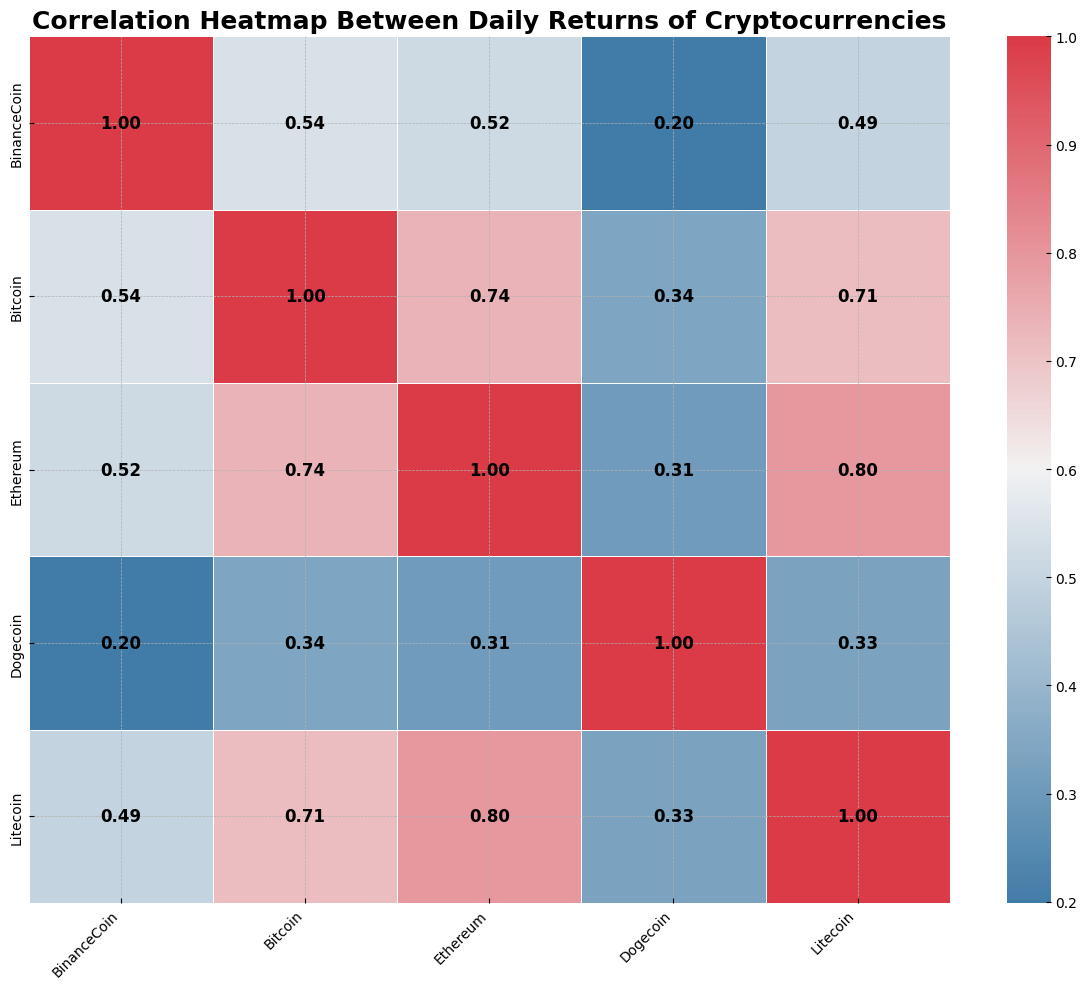

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate daily returns for correlation
for coin_name, df in crypto_data.items():
    df['Daily_Return'] = df['Close'].pct_change()

# Combine the daily returns into a single dataframe
combined_returns = pd.DataFrame({coin: df['Daily_Return'] for coin, df in crypto_data.items()})

# Drop any NaNs that result from the pct_change calculation
combined_returns.dropna(inplace=True)

# Calculate the correlation matrix
correlations = combined_returns.corr()

# Set the default matplotlib style sheet
plt.style.use('bmh')  # You can try other styles like 'seaborn', 'ggplot', etc.

# Create a more professional color palette
cmap = sns.diverging_palette(240, 10, as_cmap=True)  # Blue color palette

# Create a heatmap with bold annotations and the chosen colormap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlations, annot=True, cmap=cmap, fmt=".2f",
                      annot_kws={"size": 12, "weight": "bold", "color": "black"},
                      linewidths=0.5, linecolor='white')  # Add lines between cells

# Enhance the title with a larger font size
plt.title('Correlation Heatmap Between Daily Returns of Cryptocurrencies', fontsize=18, weight='bold')

# Rotate x-axis labels for better readability
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')

# Tight layout for better spacing
plt.tight_layout()

# Save the plot with a high resolution
plt.savefig('correlation_heatmap.png', dpi=300)

# Show the plot
plt.show()